<a href="https://colab.research.google.com/github/boucher-broderick/Ml_AI/blob/main/BreastCancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction:

Breast cancer is a significant global health concern, characterized by the rapid and uncontrolled growth of cells in breast tissue. It is the most common type of cancer in women worldwide, affecting millions each year, as noted by the World Health Organization (WHO).

The key issue in managing breast cancer lies in its timely and accurate detection, as well as effective treatment. This project seeks to tackle these challenges by developing a sophisticated machine learning model. The main goal is to create a system capable of accurately identifying breast tumors as either malignant (cancerous) or benign (non-cancerous).

This endeavor will primarily utilize a logistic regression model, which is highly effective for binary classification tasks like distinguishing between malignant and benign tumors. By analyzing various features and patterns in the data, this model will efficiently classify the tumors, thereby significantly improving the diagnostic and treatment processes for breast cancer.



#Importing Dataset:
This dataset contains a range of parameters gathered from medical scans. Our objective is to use these features to build and analyze a classification model that is adept at identifying the presence of cancer.

https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset/data

The first step is to import the data from Kaggle

In [3]:
! pip install kaggle

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
! mkdir ~/.kaggle
!cp /content/drive/MyDrive/MLandAI/kaggle.json ~/.kaggle/kaggle.json
!kaggle datasets download -d yasserh/breast-cancer-dataset

  0% 0.00/48.6k [00:00<?, ?B/s]
100% 48.6k/48.6k [00:00<00:00, 47.0MB/s]


In [6]:
! unzip breast-cancer-dataset.zip

Archive:  breast-cancer-dataset.zip
  inflating: breast-cancer.csv       


In [262]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import time
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)

df = pd.read_csv("/content/breast-cancer.csv", skipinitialspace = True)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Understanding the Data:


In [263]:
df.shape

(569, 32)

In [264]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [265]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


# The Fields

- **diagnosis:** A numerical value indicating the diagnosis, categorizing the tumor as either malignant (cancerous) or benign (non-cancerous).

- **radius_mean:** The average distance from the center of the tumor to points on its perimeter, giving an idea of the tumor's size.

- **texture_mean:** The average level of texture in the tumor, measured by the standard deviation of grayscale values in the image.

- **perimeter_mean:** The average size of the perimeter of the tumor.

- **area_mean:** The average area of the tumor.

- **smoothness_mean:** A measure of the average variation in length of the radii of the tumor, indicating how smooth or rough the tumor's surface is.

- **compactness_mean:** A calculation of how compact the tumor is, derived from the perimeter and area measurements.

- **concavity_mean:** The average number of concave portions of the contour of the tumor.

- **concave points_mean:** The average number of concave points on the contour of the tumor.

- **symmetry_mean:** A measure of the symmetry of the tumor.

- **fractal_dimension_mean:** A calculation that gives an indication of the "roughness" or complexity of the surface of the tumor.

- **radius_se:** The standard error of the radius measurements.

- **texture_se:** The standard error for texture measurements.

- **perimeter_se:** The standard error for perimeter measurements.

- **area_se:** The standard error for area measurements.

- **smoothness_se:** The standard error for smoothness measurements.

- **compactness_se:** The standard error for compactness measurements.
- **concavity_se:** The standard error for concavity measurements.
- **concave points_se:** The standard error for the measurements of concave points.
- **symmetry_se:** The standard error for symmetry measurements.
- **fractal_dimension_se:** The standard error for fractal dimension measurements.
- **radius_worst:** The worst or largest mean value for the radius (worst case scenario within the dataset).
- **texture_worst:** The worst or largest mean value for texture.
- **perimeter_worst:** The worst or largest mean value for perimeter.
- **area_worst:** The worst or largest mean value for area.
- **smoothness_worst:** The worst or largest mean value for smoothness.
- **compactness_worst:** The worst or largest mean value for compactness.
- **concavity_worst:** The worst or largest mean value for concavity.
- **concave points_worst:** The worst or largest mean value for the number of concave points.
- **symmetry_worst:** The worst or largest mean value for symmetry.
- **fractal_dimension_worst:** The worst or largest mean value for the fractal dimension.

In [266]:
px.histogram(data_frame=df, x='diagnosis', color='diagnosis',color_discrete_sequence=['#05445E','#75E6DA'])

# Clening the Data + EDA:
We first need to clean the data which involves removing unnecessary fields, checking for null values or duplicates and converting any not numerical values such as Diagnosis into a numeric representation.

Once we have cleaned the data we do an EDA: Exploritory Data Analysis. This will give us a better understanding of the data as well as which fields will be highly correlated with the target. Those fields are what while be used as variables in the regression.

In [267]:
df = df.drop(['id'],axis=1)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [268]:
df.isna().sum() #Check for Null Values

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [269]:
df.loc[df.duplicated()] # Duplicates

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


In [270]:
df['diagnosis'].replace({'B':0,'M':1},inplace = True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


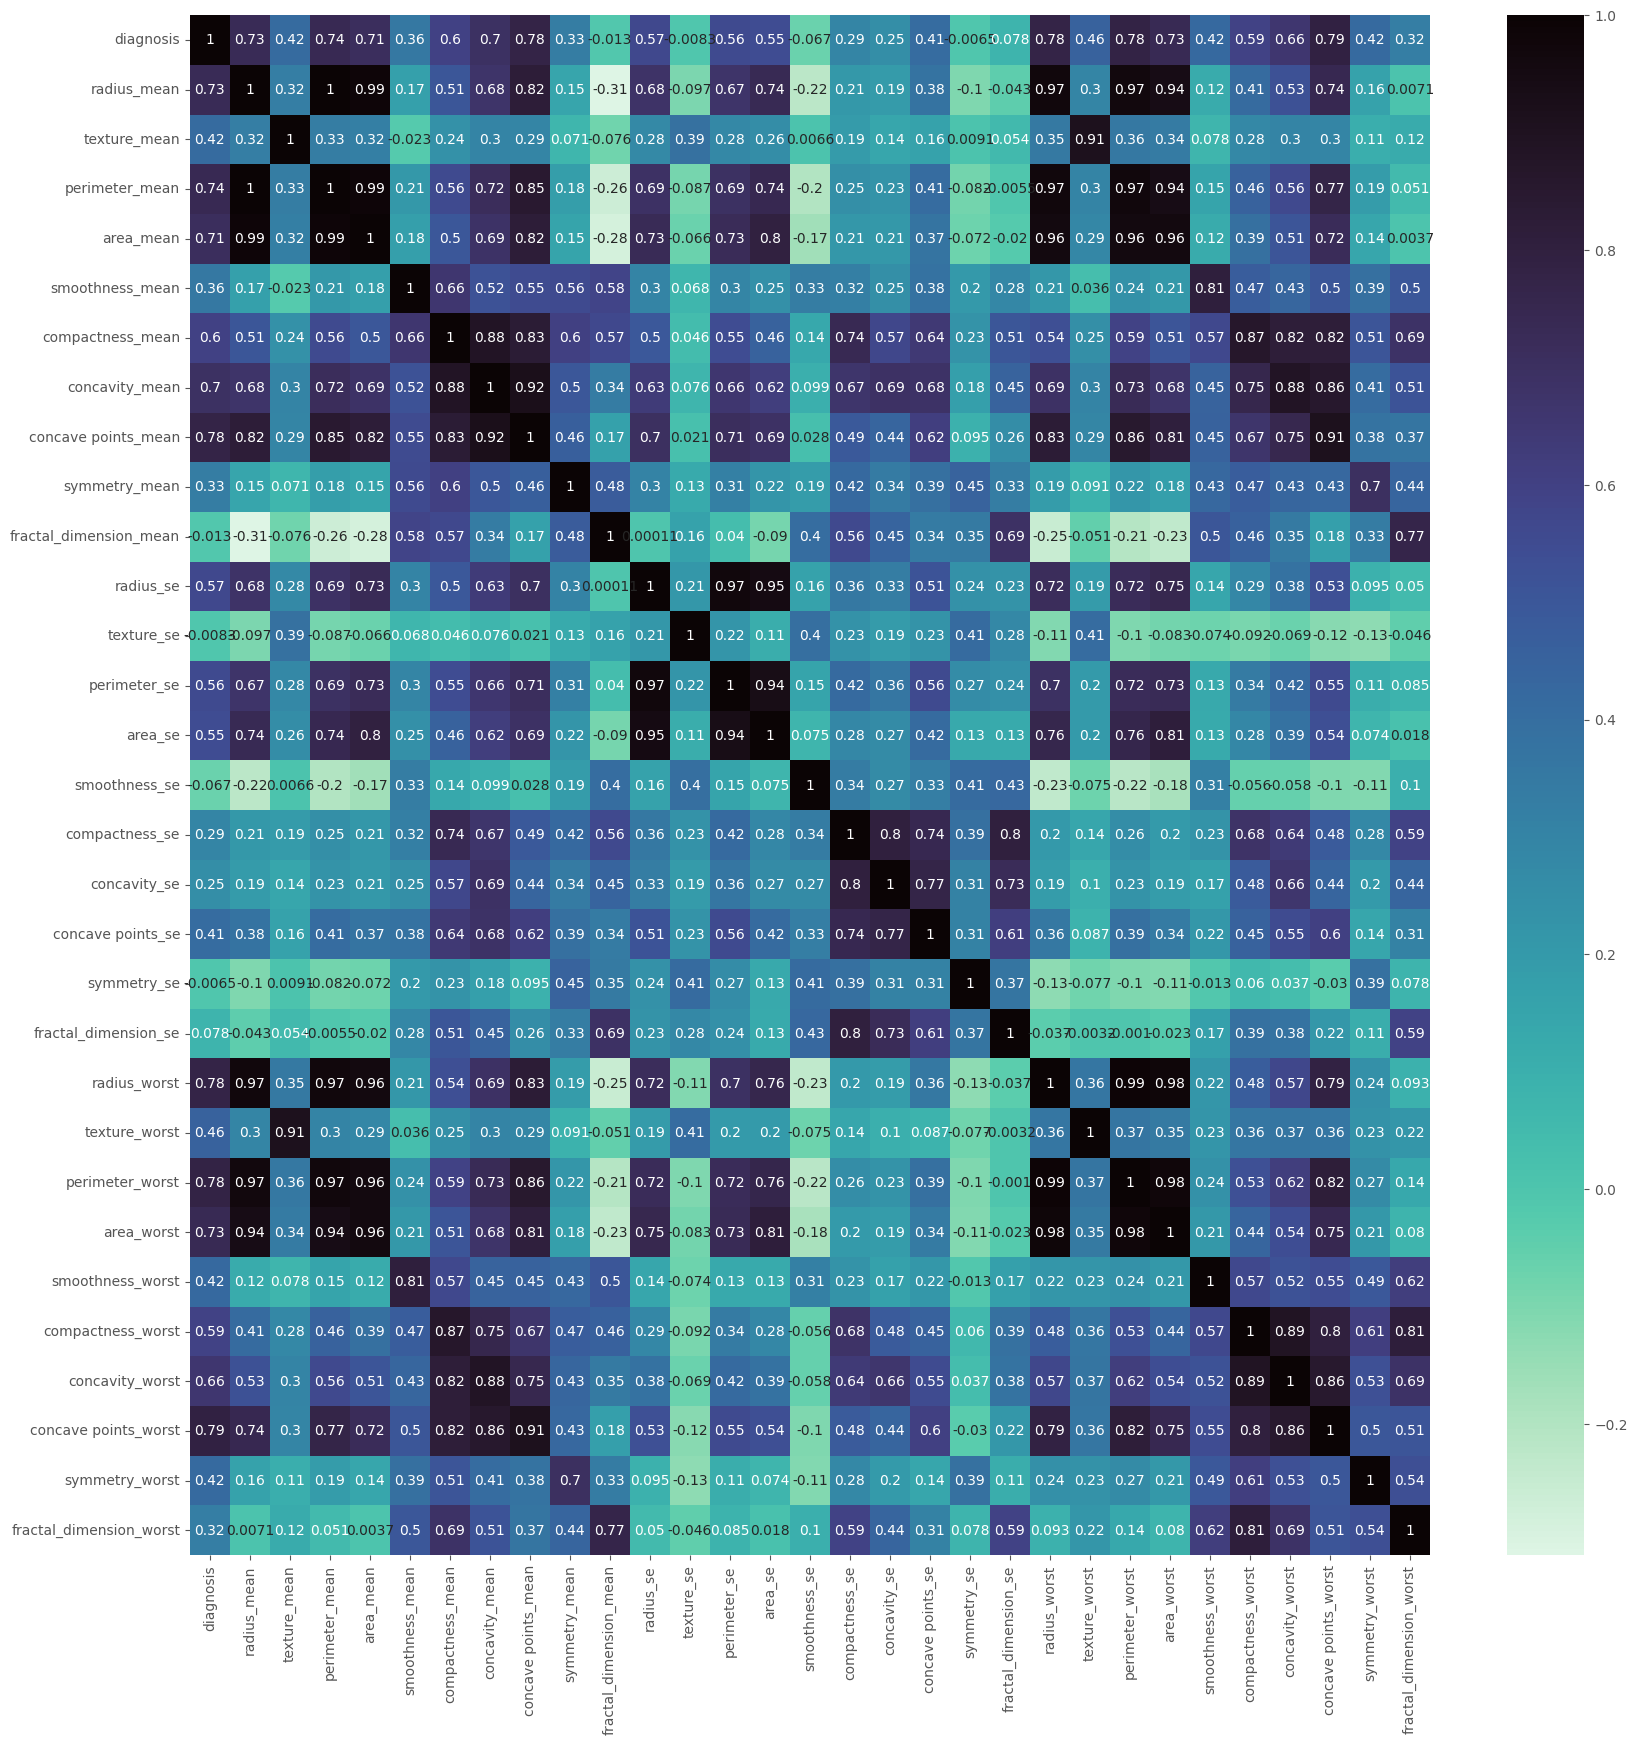

In [271]:
corr = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap='mako_r',annot=True)
plt.show()

With the graph above we are able to see how each field is correlated to each other. The most important row is the diasnosis row, where we can see which fields have the highest and lowest correlation to the target.

Lowest Correlation:
- fractal_dimension_se
- symmetry_se
- smoothness_se
- textture_se
- fractal_dimension_mean

Highest Correlation:
- concave points_worst
- perimeter_worst
- radius_worst
- concave points_mean

Now we are going to drop the columns with the lowest correlation scores, any fields that had a score < .25 and will explore the features with the highest correlation to the target.

In [272]:
df = df[['diagnosis',
    'radius_mean',
    'texture_mean',
    'perimeter_mean',
    'area_mean',
    'smoothness_mean',
    'compactness_mean',
    'concavity_mean',
    'concave points_mean',
    'symmetry_mean',
    'radius_se',
    'perimeter_se',
    'area_se',
    'compactness_se',
    'concavity_se',
    'concave points_se',
    'radius_worst',
    'texture_worst',
    'perimeter_worst',
    'area_worst',
    'smoothness_worst',
    'compactness_worst',
    'concavity_worst',
    'concave points_worst',
    'symmetry_worst',
    'fractal_dimension_worst'
]].copy()
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,radius_se,perimeter_se,area_se,compactness_se,concavity_se,concave points_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,1.0950,8.589,153.40,0.04904,0.05373,0.01587,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.5435,3.398,74.08,0.01308,0.01860,0.01340,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.7456,4.585,94.03,0.04006,0.03832,0.02058,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.4956,3.445,27.23,0.07458,0.05661,0.01867,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.7572,5.438,94.44,0.02461,0.05688,0.01885,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [273]:
df['diagnosis'] = df['diagnosis'].astype('category')
fig = px.scatter(data_frame=df, x='concave points_worst',
                 color='diagnosis',
                 color_discrete_map={0: '#05445E', 1: '#FF0000'})
fig.show()

In [274]:
fig = px.scatter(data_frame=df, x='perimeter_worst',
                 color='diagnosis',
                 color_discrete_map={0: '#05445E', 1: '#FF0000'})
fig.show()

In [275]:
fig = px.scatter(data_frame=df, x='radius_worst',
                 color='diagnosis',
                 color_discrete_map={0: '#05445E', 1: '#FF0000'})
fig.show()

In [276]:
fig = px.scatter(data_frame=df, x='concave points_mean',
                 color='diagnosis',
                 color_discrete_map={0: '#05445E', 1: '#FF0000'})
fig.show()
df['diagnosis'] = df['diagnosis'].astype('int')

# Logistic Regression
Now that we have an understanding of the data, cleaned our data, and have seen that there are numerous variables that are correlated with the target, we can begin with the Logistical Regression.

The two gradient descent methods I will be using are:

- Batch Gradient Descent: Batch Gradient Descent is an optimization algorithm used for parameter learning in machine learning models. It calculates the gradient of the cost function for the entire dataset to update the model parameters in each iteration. This method is computationally intensive and requires substantial memory to hold the entire dataset, but it offers stable, consistent updates, leading to steady convergence. It's typically preferred for smaller datasets where the entire data can fit into memory and when computational resources are not a limiting factor.

- Stochastic Gradient Descent (SGD): Stochastic Gradient Descent optimizes model parameters by updating them for each individual training example, rather than the entire dataset at once. This approach is more computationally efficient, especially for large datasets, as it doesn't require the entire dataset to be loaded into memory. While it provides faster convergence and can potentially escape local minima due to its more frequent and noisy updates, these updates can also be less stable, leading to an erratic convergence path. SGD is particularly useful in large-scale and online learning scenarios.

In [277]:
def sigmoid_function(input_value):
    return 1 / (1 + np.exp(-input_value))

def cost_function(theta_values, features, target_values):
    num_samples = len(target_values)
    predicted = sigmoid_function(np.dot(features, theta_values))
    predicted = np.clip(predicted, 1e-15, 1 - 1e-15)
    cost_value = (-1 / num_samples) * np.sum(target_values * np.log(predicted) + (1 - target_values) * np.log(1 - predicted))
    return cost_value

def gradient_calculation(features, predicted, target_values):
    num_samples = len(target_values)
    gradient_value = np.dot(features.T, (predicted - target_values)) / num_samples
    return gradient_value

In [278]:
def batch_gradient_descent(features, target_values, theta_values, learning_rate=0.01, epochs=500):
    for epoch in range(epochs):
        predicted = sigmoid_function(np.dot(features, theta_values))
        gradient = gradient_calculation(features, predicted, target_values)
        theta_values -= learning_rate * gradient

        if epoch % 10 == 0:
            cost = cost_function(theta_values, features, target_values)
            print(f"Epoch {epoch+10}/{epochs}, Cost: {cost}")

    return theta_values


def stochastic_gradient_descent(features, target_values, theta_values, learning_rate=0.01, epochs=100):
    num_samples = len(target_values)

    for epoch in range(epochs):
        for i in range(num_samples):
            index = np.random.randint(0, num_samples)
            feature_sample = features[index:index+1]
            target_sample = target_values[index:index+1]

            predicted = sigmoid_function(np.dot(feature_sample, theta_values))

            gradient_value = gradient_calculation(feature_sample, predicted, target_sample)

            theta_values = theta_values - learning_rate * gradient_value

        if epoch % 10 == 0:
            cost = cost_function(theta_values, features, target_values)
            print(f"Epoch {epoch+10}/{epochs}, Cost: {cost}")

    return theta_values

In [279]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(['diagnosis'], axis=1)
Y = df['diagnosis']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

theta_initial = np.zeros(X_train.shape[1])



start_time = time.time()
theta_optimized_batch = batch_gradient_descent(X_train, y_train, theta_initial.copy())
end_time = time.time()
elapsed_time1 = end_time - start_time
print(f"Elapsed time: {elapsed_time1} seconds\n")

start_time = time.time()
theta_optimized_stochastic = stochastic_gradient_descent(X_train, y_train, theta_initial.copy())
end_time = time.time()
elapsed_time2 = end_time - start_time
print(f"Elapsed time: {elapsed_time2} seconds\n")

Epoch 10/500, Cost: 0.6739769289247761
Epoch 20/500, Cost: 0.5354881285803255
Epoch 30/500, Cost: 0.4548584387911648
Epoch 40/500, Cost: 0.4022822466538284
Epoch 50/500, Cost: 0.3650783053762286
Epoch 60/500, Cost: 0.33718193269761865
Epoch 70/500, Cost: 0.3153518172018845
Epoch 80/500, Cost: 0.29770233132493756
Epoch 90/500, Cost: 0.28306265528444036
Epoch 100/500, Cost: 0.2706674151134901
Epoch 110/500, Cost: 0.2599949802322153
Epoch 120/500, Cost: 0.25067735917410155
Epoch 130/500, Cost: 0.24244728880344987
Epoch 140/500, Cost: 0.23510577461339371
Epoch 150/500, Cost: 0.22850142521057107
Epoch 160/500, Cost: 0.22251687014278662
Epoch 170/500, Cost: 0.21705958318248686
Epoch 180/500, Cost: 0.2120555302680211
Epoch 190/500, Cost: 0.20744467764962976
Epoch 200/500, Cost: 0.2031777544648438
Epoch 210/500, Cost: 0.19921387929731843
Epoch 220/500, Cost: 0.19551879317807597
Epoch 230/500, Cost: 0.19206352558430234
Epoch 240/500, Cost: 0.18882337441035082
Epoch 250/500, Cost: 0.185777116825

In [280]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def predict(theta, X):
    probabilities = sigmoid_function(np.dot(X, theta))
    return [1 if x >= 0.5 else 0 for x in probabilities]

binary_predictions_batch = predict(theta_optimized_batch, X_test)

accuracy1 = accuracy_score(y_test, binary_predictions_batch)
precision1 = precision_score(y_test, binary_predictions_batch, zero_division=0)
recall1 = recall_score(y_test, binary_predictions_batch, zero_division=0)
f11 = f1_score(y_test, binary_predictions_batch, zero_division=0)
conf_matrix1 = confusion_matrix(y_test, binary_predictions_batch)

# Print the results
print("Batch Gradient Descent Evaluation:")
print(f'Accuracy: {accuracy1}')
print(f'Precision: {precision1}')
print(f'Recall: {recall1}')
print(f'F1 Score: {f11}')
print(f'Confusion Matrix:\n{conf_matrix1}\n')

binary_predictions_stoch = predict(theta_optimized_stochastic, X_test)

accuracy2 = accuracy_score(y_test, binary_predictions_stoch)
precision2 = precision_score(y_test, binary_predictions_stoch, zero_division=0)
recall2 = recall_score(y_test, binary_predictions_stoch, zero_division=0)
f12 = f1_score(y_test, binary_predictions_stoch, zero_division=0)
conf_matrix2 = confusion_matrix(y_test, binary_predictions_stoch)

# Print the results
print("Stochastic Gradient Descent Evaluation:")
print(f'Accuracy: {accuracy2}')
print(f'Precision: {precision2}')
print(f'Recall: {recall2}')
print(f'F1 Score: {f12}')
print(f'Confusion Matrix:\n{conf_matrix2}')

Batch Gradient Descent Evaluation:
Accuracy: 0.9736842105263158
Precision: 0.9545454545454546
Recall: 0.9767441860465116
F1 Score: 0.9655172413793104
Confusion Matrix:
[[69  2]
 [ 1 42]]

Stochastic Gradient Descent Evaluation:
Accuracy: 0.9824561403508771
Precision: 0.9767441860465116
Recall: 0.9767441860465116
F1 Score: 0.9767441860465116
Confusion Matrix:
[[70  1]
 [ 1 42]]


# Optimized Gradient Descent Methods:

Adam Optimization:

Adam (Adaptive Moment Estimation) is an advanced optimization algorithm used in training machine learning models. It combines elements from two other optimization methods: RMSProp and AdaGrad. Adam maintains separate learning rates for each parameter, adjusted throughout the learning process. It computes adaptive learning rates based on the first (mean) and second (uncentered variance) moments of the gradients. This approach helps in handling sparse gradients and non-stationary objectives, common in many real-world scenarios. Adam is often favored for its efficiency in large datasets and complex models, particularly deep learning architectures, due to its ability to converge faster and more effectively handle noisy data or gradients.

RMSprop Optimization:

RMSprop, short for Root Mean Square Propagation, is an optimization algorithm that also adapts the learning rates during training. It modifies the general gradient descent by dividing the learning rate for a weight by a running average of the magnitudes of recent gradients for that weight. This adaptive learning rate makes RMSprop more effective for problems with noisy or sparse gradients. It addresses the issue of drastically different gradients in different dimensions, which can be a challenge in vanilla gradient descent. RMSprop is known for its effectiveness in recurrent neural networks and other contexts where the optimization landscape is much more complex and non-convex.

Why They Are Optimized Compared to Batch and Stochastic Gradient Descent:

Both Adam and RMSprop are considered advancements over traditional Batch and Stochastic Gradient Descent due to their adaptive learning rate mechanisms. In basic gradient descent methods, a single learning rate is applied to all model parameters, which can be inefficient in complex optimization landscapes. Adam and RMSprop, by adjusting the learning rate based on the recent history of gradients, can navigate these landscapes more effectively. They are less sensitive to hyperparameter settings (especially the learning rate) and can accelerate the training process in cases where the gradient’s scale varies across parameters or data points. This makes them particularly useful in large-scale and complex machine learning tasks, such as training deep neural networks.

In [281]:
def adam_optimization(features, target_values, theta_values, learning_rate =0.01, epochs=500, beta1=0.9, beta2=0.999, epsilon=1e-8):
    num_samples = len(target_values)
    m = np.zeros_like(theta_values)
    v = np.zeros_like(theta_values)
    for epoch in range(1, epochs + 1):
        predicted = sigmoid_function(np.dot(features, theta_values))
        gradient = gradient_calculation(features, predicted, target_values)

        m = beta1 * m + (1 - beta1) * gradient
        v = beta2 * v + (1 - beta2) * (gradient ** 2)
        m_hat = m / (1 - beta1 ** epoch)
        v_hat = v / (1 - beta2 ** epoch)

        theta_values -= learning_rate * m_hat / (np.sqrt(v_hat) + epsilon)

        if epoch % 10 == 0:
            cost = cost_function(theta_values, features, target_values)
            print(f"Epoch {epoch}/{epochs}, Cost: {cost}")

    return theta_values



def rmsprop_optimization(features, target_values, theta_values, learning_rate=0.01, epochs=500, beta=0.9, epsilon=1e-8):
    num_samples = len(target_values)
    s = np.zeros_like(theta_values)
    for epoch in range(epochs):
        predicted = sigmoid_function(np.dot(features, theta_values))
        gradient = gradient_calculation(features, predicted, target_values)

        s = beta * s + (1 - beta) * (gradient ** 2)
        theta_values -= learning_rate * gradient / (np.sqrt(s) + epsilon)

        if epoch % 10 == 0:
            cost = cost_function(theta_values, features, target_values)
            print(f"Epoch {epoch+10}/{epochs}, Cost: {cost}")

    return theta_values

In [282]:
start_time = time.time()
adam = adam_optimization(X_train, y_train, theta_initial.copy())
end_time = time.time()
elapsed_time3 = end_time - start_time
print(f"Elapsed time: {elapsed_time3} seconds\n")

start_time = time.time()
rmsprop = rmsprop_optimization(X_train, y_train, theta_initial.copy())
end_time = time.time()
elapsed_time4 = end_time - start_time
print(f"Elapsed time: {elapsed_time4} seconds\n")

Epoch 10/500, Cost: 0.3334420467843122
Epoch 20/500, Cost: 0.23214594438981553
Epoch 30/500, Cost: 0.18170120520703514
Epoch 40/500, Cost: 0.15309140758171733
Epoch 50/500, Cost: 0.13686894002074332
Epoch 60/500, Cost: 0.12613679339804315
Epoch 70/500, Cost: 0.11812181521218872
Epoch 80/500, Cost: 0.11178985906475579
Epoch 90/500, Cost: 0.1066060792924645
Epoch 100/500, Cost: 0.1022400218748567
Epoch 110/500, Cost: 0.09848397962519548
Epoch 120/500, Cost: 0.09520298432541618
Epoch 130/500, Cost: 0.0923033230566911
Epoch 140/500, Cost: 0.0897162110244362
Epoch 150/500, Cost: 0.08738945882416396
Epoch 160/500, Cost: 0.08528258338014892
Epoch 170/500, Cost: 0.0833635914203955
Epoch 180/500, Cost: 0.08160678123244991
Epoch 190/500, Cost: 0.07999121403532204
Epoch 200/500, Cost: 0.07849962532355706
Epoch 210/500, Cost: 0.07711762939791957
Epoch 220/500, Cost: 0.07583312586741282
Epoch 230/500, Cost: 0.07463584959600285
Epoch 240/500, Cost: 0.07351702466754564
Epoch 250/500, Cost: 0.07246909

In [283]:
binary_predictions_batch = predict(adam, X_test)

accuracy3 = accuracy_score(y_test, binary_predictions_batch)
precision3 = precision_score(y_test, binary_predictions_batch, zero_division=0)
recall3 = recall_score(y_test, binary_predictions_batch, zero_division=0)
f13 = f1_score(y_test, binary_predictions_batch, zero_division=0)
conf_matrix3 = confusion_matrix(y_test, binary_predictions_batch)

# Print the results
print("Adam Optimization Gradient Descent Evaluation:")
print(f'Accuracy: {accuracy3}')
print(f'Precision: {precision3}')
print(f'Recall: {recall3}')
print(f'F1 Score: {f13}')
print(f'Confusion Matrix:\n{conf_matrix3}\n')

binary_predictions_stoch = predict(rmsprop, X_test)

accuracy4 = accuracy_score(y_test, binary_predictions_stoch)
precision4 = precision_score(y_test, binary_predictions_stoch, zero_division=0)
recall4 = recall_score(y_test, binary_predictions_stoch, zero_division=0)
f14 = f1_score(y_test, binary_predictions_stoch, zero_division=0)
conf_matrix4 = confusion_matrix(y_test, binary_predictions_stoch)

# Print the results
print("Rmsprop Optimization Gradient Descent Evaluation:")
print(f'Accuracy: {accuracy4}')
print(f'Precision: {precision4}')
print(f'Recall: {recall4}')
print(f'F1 Score: {f14}')
print(f'Confusion Matrix:\n{conf_matrix4}')

Adam Optimization Gradient Descent Evaluation:
Accuracy: 0.9824561403508771
Precision: 0.9767441860465116
Recall: 0.9767441860465116
F1 Score: 0.9767441860465116
Confusion Matrix:
[[70  1]
 [ 1 42]]

Rmsprop Optimization Gradient Descent Evaluation:
Accuracy: 0.9736842105263158
Precision: 0.9545454545454546
Recall: 0.9767441860465116
F1 Score: 0.9655172413793104
Confusion Matrix:
[[69  2]
 [ 1 42]]


# Conclusion


In [284]:
variable_names = ["Batch", "Stochastic", "Adam", "Rmsprop"]
values = [elapsed_time1, elapsed_time2, elapsed_time3, elapsed_time4]

data = {
    'Gradient Descent Method': variable_names,
    'Elapsed Time (Seconds)': values
}

fig = px.bar(data, x='Gradient Descent Method', y='Elapsed Time (Seconds)',
             title='Time of Each Gradient Descent Method',
             color='Gradient Descent Method')

fig.show()

In [285]:
total_values = [[accuracy1, accuracy2, accuracy3, accuracy4],
                [precision1, precision2, precision3, precision4],
                [recall1, recall2, recall3, recall4],
                [f11, f12, f13, f14]]

metric_names = ["Accuracy", "Precision", "Recall", "F1 Score"]
variable_names = ["Batch", "Stochastic", "Adam", "Rmsprop"]

for i, metric in enumerate(metric_names):
    data = {
        'Gradient Descent Method': variable_names,
        metric: [val * 100 for val in total_values[i]]
    }

    fig = px.bar(data, x='Gradient Descent Method', y=metric,
                 labels={metric: f'{metric} (%)'},
                 title=f'{metric} of Each Gradient Descent Method')
    fig.show()

In [286]:
conf_matrices = [conf_matrix1, conf_matrix2, conf_matrix3, conf_matrix4]
method_names = ["Batch", "Stochastic", "Adam", "Rmsprop"]

for i, method in enumerate(method_names):
    fig = px.imshow(conf_matrices[i],
                    labels=dict(x="Predicted Label", y="True Label", color="Count"),
                    x=['Class 0', 'Class 1'],
                    y=['Class 0', 'Class 1'],
                    title=f'Confusion Matrix for {method} Method',
                    text_auto=True)
    fig.update_xaxes(side="top")
    fig.show()

# Conclusion:

In evaluating various gradient descent optimization techniques on a given dataset, a clear distinction emerges between the performance of optimized and non-optimized algorithms, which include Adam and RMSprop (optimized) versus Batch and Stochastic Gradient Descent (non-optimized).

Performance Comparison:

Adam Optimization Gradient Descent and Stochastic Gradient Descent showed the best performance in terms of accuracy, with Adam being slightly more efficient in computation time. Adam's adaptive learning rate seems to be particularly effective in handling the dataset, suggesting its suitability for datasets with varying characteristics.
RMSprop Optimization Gradient Descent and Batch Gradient Descent displayed similar accuracy levels, slightly lower than Adam and SGD. This indicates that even non-optimized methods like Batch Gradient Descent can compete closely with optimized methods in certain scenarios.
Comparison with Original Implementation of Gradient Descent:

The Original Batch Gradient Descent was found to be quite effective and efficient for this dataset, demonstrating that simpler methods can still yield robust results, especially in less complex datasets.
The Original Stochastic Gradient Descent outperformed the optimized methods in terms of accuracy, albeit at a higher computational cost. This highlights its effectiveness in fine-tuning models, a desirable trait for tasks requiring high precision.
Applicability of Optimization Algorithms:

The choice to use optimization algorithms like Adam and RMSprop is more justified for complex or large datasets, where their advanced features can handle intricacies more effectively.
For simpler, smaller datasets, like the one in this study, the benefits of optimization algorithms are not as pronounced. In such cases, the simplicity and computational efficiency of the original methods like Batch and Stochastic Gradient Descent might be more advantageous.
The decision also involves a trade-off between computational efficiency and accuracy. While methods like Stochastic Gradient Descent provide high accuracy, they demand significant computational resources. Conversely, methods like Batch Gradient Descent offer a balance but may not always achieve the highest levels of accuracy.

In conclusion, the decision to use optimized gradient descent algorithms should be informed by the specific requirements of the task and the characteristics of the dataset. For tasks involving complex, large datasets, optimized methods offer significant advantages in handling data variability and ensuring robust performance. However, for smaller and simpler datasets, traditional gradient descent methods might be sufficient, offering an efficient solution without significantly compromising on performance. Ultimately, the choice hinges on the desired balance between computational efficiency and model accuracy, along with the specificities of the dataset and task at hand.